<a href="https://colab.research.google.com/github/danieltumanggor/UTS-Pengolahan-Citra-Daniel-Tumanggor/blob/main/PengolahanCitra/UTS_DT_PC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
import pandas as pd
import math

In [ ]:
img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)



In [ ]:
blur_spatial = cv2.GaussianBlur(img, (21,21), sigmaX=5)

In [ ]:
F = np.fft.fft2(img)
F_shift = np.fft.fftshift(F)


In [ ]:
magnitude_spectrum = 20 * np.log(np.abs(F_shift) + 1)



In [ ]:
def gaussian_lpf(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows//2, cols//2

    x = np.linspace(0, rows-1, rows)
    y = np.linspace(0, cols-1, cols)
    X, Y = np.meshgrid(y, x)
    D = np.sqrt((X - ccol)**2 + (Y - crow)**2)

    H = np.exp(-(D**2) / (2*(cutoff**2)))
    return H

cutoffs = [10, 30, 60]
gauss_freq_results = []

# Filtering
for c in cutoffs:
    H = gaussian_lpf(img.shape, c)
    F_filtered = F_shift * H
    img_back = np.abs(np.fft.ifft2(np.fft.ifftshift(F_filtered)))
    gauss_freq_results.append(img_back.astype(np.uint8))

In [ ]:
def mse(a, b):
    return np.mean((a.astype("float") - b.astype("float")) ** 2)

def psnr(a, b):
    m = mse(a, b)
    if m == 0:
        return float('inf')
    return 20 * math.log10(255.0 / math.sqrt(m))

def ssim_index(a, b):
    return ssim(a, b, data_range=255)


In [ ]:
rows_metric = []


In [ ]:
# Blur spasial
rows_metric.append({
    "Filter": "Gaussian Blur (Spatial)",
    "Cutoff/Sigma": "sigma=5",
    "MSE": mse(img, blur_spatial),
    "PSNR": psnr(img, blur_spatial),
    "SSIM": ssim_index(img, blur_spatial)
})

# Gaussian LPF Frekuensi
for c, result in zip(cutoffs, gauss_freq_results):
    rows_metric.append({
        "Filter": "Gaussian LPF (Freq)",
        "Cutoff/Sigma": f"cutoff={c}",
        "MSE": mse(img, result),
        "PSNR": psnr(img, result),
        "SSIM": ssim_index(img, result)
    })

df_metric = pd.DataFrame(rows_metric)
print("\n=== HASIL MSE, PSNR, SSIM ===")
display(df_metric)


=== HASIL MSE, PSNR, SSIM ===


,Filter,Cutoff/Sigma,MSE,PSNR,SSIM
0,Gaussian Blur (Spatial),sigma=5,930.402778,18.444094,0.458615
1,Gaussian LPF (Freq),cutoff=10,647.967469,20.015272,0.617585
2,Gaussian LPF (Freq),cutoff=30,190.497747,25.331905,0.895698
3,Gaussian LPF (Freq),cutoff=60,42.200123,31.877666,0.977916


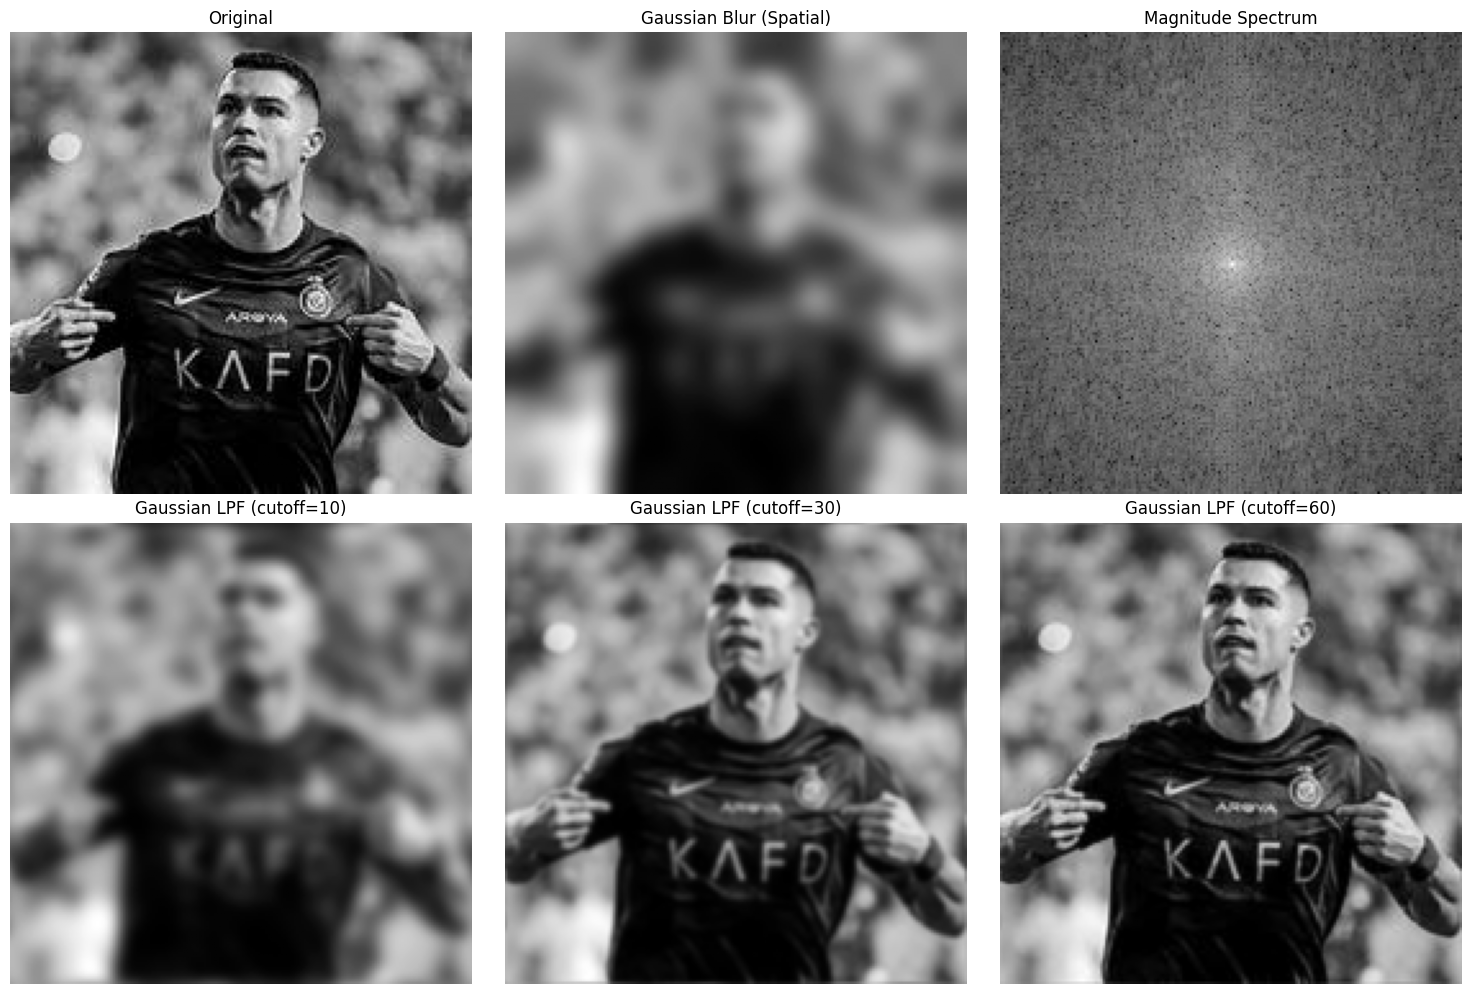

In [ ]:
plt.figure(figsize=(15,10))

# Original
plt.subplot(2,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

# Spatial Gaussian Blur
plt.subplot(2,3,2)
plt.imshow(blur_spatial, cmap='gray')
plt.title("Gaussian Blur (Spatial)")
plt.axis('off')

# Magnitude Spectrum
plt.subplot(2,3,3)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis('off')

# Gaussian LPF 10
plt.subplot(2,3,4)
plt.imshow(gauss_freq_results[0], cmap='gray')
plt.title("Gaussian LPF (cutoff=10)")
plt.axis('off')

# Gaussian LPF 30
plt.subplot(2,3,5)
plt.imshow(gauss_freq_results[1], cmap='gray')
plt.title("Gaussian LPF (cutoff=30)")
plt.axis('off')

# Gaussian LPF 60
plt.subplot(2,3,6)
plt.imshow(gauss_freq_results[2], cmap='gray')
plt.title("Gaussian LPF (cutoff=60)")
plt.axis('off')

plt.tight_layout()
plt.show()
